Importing Required Libraries

In [1]:
# Array
import numpy as np

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

# DL model
from keras.models import Sequential
from keras.layers import Dense, Dropout

#Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

Data Importing & Cheking Info, Null Values and Statistical Description

In [2]:

# Data Importing
h1 = pd.read_csv("./H1.csv")
h2 = pd.read_csv("./H2.csv")

frames = [h1, h2]

# Merging the two datasets H1 & H2
hotel = pd.concat(frames)

# Data
hotel.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,0,737,2015,July,27,1,0,0,2,0.0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,0,7,2015,July,27,1,0,1,1,0.0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,0,13,2015,July,27,1,0,1,1,0.0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,0,14,2015,July,27,1,0,2,2,0.0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
#The majority of this column values are NULL Which make this feature of no use.
hotel["Company"].value_counts()

Company
       NULL    112593
         40       924
223               784
         67       267
         45       250
                ...  
376                 1
400                 1
212                 1
        213         1
506                 1
Name: count, Length: 443, dtype: int64

In [4]:
# Dropping Column Company
hotel = hotel.drop('Company', axis=1)
hotel.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0.0,...,3,No Deposit,NULL,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,0,737,2015,July,27,1,0,0,2,0.0,...,4,No Deposit,NULL,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,0,7,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,NULL,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,0,13,2015,July,27,1,0,1,1,0.0,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,0,14,2015,July,27,1,0,2,2,0.0,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [5]:
temp = hotel[['IsCanceled', 'ReservationStatus']]    # The two features are basically the same
# IsCanceled        ReservationStatus
#     0 --------------> Check-Out
#     1 --------------> Canceled
#     1 --------------> No-Show
display(temp)

,IsCanceled,ReservationStatus
0,0,Check-Out
1,0,Check-Out
2,0,Check-Out
3,0,Check-Out
4,0,Check-Out
...,...,...
79325,0,Check-Out
79326,0,Check-Out
79327,0,Check-Out
79328,0,Check-Out


In [6]:
#Dropping Column IsCanceled
hotel = hotel.drop('IsCanceled', axis=1)
hotel.head()

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,342,2015,July,27,1,0,0,2,0.0,0,...,3,No Deposit,NULL,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,737,2015,July,27,1,0,0,2,0.0,0,...,4,No Deposit,NULL,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,7,2015,July,27,1,0,1,1,0.0,0,...,0,No Deposit,NULL,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,13,2015,July,27,1,0,1,1,0.0,0,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,14,2015,July,27,1,0,2,2,0.0,0,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [7]:
hotel["Agent"] = hotel["Agent"].str.strip()     #Values called NULL in this Column were indented by unseen whitspace as follows: '       NULL'
hotel["Agent"] = hotel["Agent"].replace("NULL", np.nan)
hotel.head()

,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,BookingChanges,DepositType,Agent,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,342,2015,July,27,1,0,0,2,0.0,0,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,737,2015,July,27,1,0,0,2,0.0,0,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,7,2015,July,27,1,0,1,1,0.0,0,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,13,2015,July,27,1,0,1,1,0.0,0,...,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,14,2015,July,27,1,0,2,2,0.0,0,...,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [8]:
# Data Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 79329
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LeadTime                     119390 non-null  int64  
 1   ArrivalDateYear              119390 non-null  int64  
 2   ArrivalDateMonth             119390 non-null  object 
 3   ArrivalDateWeekNumber        119390 non-null  int64  
 4   ArrivalDateDayOfMonth        119390 non-null  int64  
 5   StaysInWeekendNights         119390 non-null  int64  
 6   StaysInWeekNights            119390 non-null  int64  
 7   Adults                       119390 non-null  int64  
 8   Children                     119386 non-null  float64
 9   Babies                       119390 non-null  int64  
 10  Meal                         119390 non-null  object 
 11  Country                      118902 non-null  object 
 12  MarketSegment                119390 non-null  object 
 13  Distr

In [9]:
#Null Values
hotel.isnull().sum()

LeadTime                           0
ArrivalDateYear                    0
ArrivalDateMonth                   0
ArrivalDateWeekNumber              0
ArrivalDateDayOfMonth              0
StaysInWeekendNights               0
StaysInWeekNights                  0
Adults                             0
Children                           4
Babies                             0
Meal                               0
Country                          488
MarketSegment                      0
DistributionChannel                0
IsRepeatedGuest                    0
PreviousCancellations              0
PreviousBookingsNotCanceled        0
ReservedRoomType                   0
AssignedRoomType                   0
BookingChanges                     0
DepositType                        0
Agent                          16340
DaysInWaitingList                  0
CustomerType                       0
ADR                                0
RequiredCarParkingSpaces           0
TotalOfSpecialRequests             0
R

In [10]:
# Filling nullable values with random convenient data while not affecting the learning results.
hotel["Country"].fillna(method = "ffill", inplace = True)
hotel["Children"].fillna(method = "ffill", inplace = True)
hotel["Agent"].fillna(method = "ffill", inplace = True)
hotel.iloc[0, 22] = 304
hotel.iloc[1, 22] = 240
hotel.iloc[2, 22] = 304
hotel.isnull().sum()

LeadTime                       0
ArrivalDateYear                0
ArrivalDateMonth               0
ArrivalDateWeekNumber          0
ArrivalDateDayOfMonth          0
StaysInWeekendNights           0
StaysInWeekNights              0
Adults                         0
Children                       0
Babies                         0
Meal                           0
Country                        0
MarketSegment                  0
DistributionChannel            0
IsRepeatedGuest                0
PreviousCancellations          0
PreviousBookingsNotCanceled    0
ReservedRoomType               0
AssignedRoomType               0
BookingChanges                 0
DepositType                    0
Agent                          3
DaysInWaitingList              0
CustomerType                   0
ADR                            0
RequiredCarParkingSpaces       0
TotalOfSpecialRequests         0
ReservationStatus              0
ReservationStatusDate          0
dtype: int64

In [11]:
# Datatype changing
hotel = hotel.astype({'Children' : 'int64'})

cat = hotel.select_dtypes(exclude=[np.number])

for i in cat.columns:
    hotel[i] = hotel[i].astype('category')

# Data Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 79329
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   LeadTime                     119390 non-null  int64   
 1   ArrivalDateYear              119390 non-null  int64   
 2   ArrivalDateMonth             119390 non-null  category
 3   ArrivalDateWeekNumber        119390 non-null  int64   
 4   ArrivalDateDayOfMonth        119390 non-null  int64   
 5   StaysInWeekendNights         119390 non-null  int64   
 6   StaysInWeekNights            119390 non-null  int64   
 7   Adults                       119390 non-null  int64   
 8   Children                     119390 non-null  int64   
 9   Babies                       119390 non-null  int64   
 10  Meal                         119390 non-null  category
 11  Country                      119390 non-null  category
 12  MarketSegment                119390 non-null  cate

In [12]:
# Checking For balanced Data
hotel["ReservationStatus"].value_counts()

ReservationStatus
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [13]:
hotel["ReservationStatus"] = hotel["ReservationStatus"].replace("No-Show", "Canceled")
hotel["ReservationStatus"].value_counts()

ReservationStatus
Check-Out    75166
Canceled     44224
Name: count, dtype: int64

<Axes: ylabel='count'>

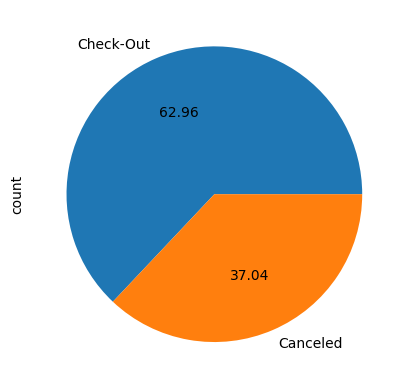

In [14]:
#visualizing it
hotel["ReservationStatus"].value_counts().plot.pie(autopct='%.2f')

Data Preprocessing For Machine Learning

In [15]:
# Data Labelencoding
for i in cat.columns:
    hotel[i+"_encoder"] = LabelEncoder().fit_transform(hotel[i])

#print(hotel.head())

# Taking numerical values
num = hotel.select_dtypes(include=[np.number])

#Selecting features & target variable
x = num.drop(columns='ReservationStatus_encoder')
y = num['ReservationStatus_encoder']

#Data Scaling
x = pd.DataFrame(RobustScaler().fit_transform(x.to_numpy()), columns=x.columns)

#Scaled data
x.head()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,...,Meal_encoder,Country_encoder,MarketSegment_encoder,DistributionChannel_encoder,ReservedRoomType_encoder,AssignedRoomType_encoder,DepositType_encoder,Agent_encoder,CustomerType_encoder,ReservationStatusDate_encoder
0,1.922535,-1.0,-0.045455,-1.0,-0.5,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.683544,-1.0,-2.0,0.666667,0.666667,0.0,0.769231,0.0,1.177893
1,4.704225,-1.0,-0.045455,-1.0,-0.5,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.683544,-1.0,-2.0,0.666667,0.666667,0.0,0.769231,0.0,1.177893
2,-0.436620,-1.0,-0.045455,-1.0,-0.5,-0.5,-1.0,0.0,0.0,0.0,...,0.0,-0.278481,-1.0,-2.0,0.000000,0.666667,0.0,0.769231,0.0,1.234888
3,-0.394366,-1.0,-0.045455,-1.0,-0.5,-0.5,-1.0,0.0,0.0,0.0,...,0.0,-0.278481,-1.5,-3.0,0.000000,0.000000,0.0,-0.031674,0.0,1.234888
4,-0.387324,-1.0,-0.045455,-1.0,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.278481,0.5,0.0,0.000000,0.000000,0.0,-0.276018,0.0,1.291883


In [16]:
data = x.join(y)

# Final scaled Data
data.head()

,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,...,Country_encoder,MarketSegment_encoder,DistributionChannel_encoder,ReservedRoomType_encoder,AssignedRoomType_encoder,DepositType_encoder,Agent_encoder,CustomerType_encoder,ReservationStatusDate_encoder,ReservationStatus_encoder
0,1.922535,-1.0,-0.045455,-1.0,-0.5,-1.0,0.0,0.0,0.0,0.0,...,0.683544,-1.0,-2.0,0.666667,0.666667,0.0,0.769231,0.0,1.177893,1.0
0,1.922535,-1.0,-0.045455,-1.0,-0.5,-1.0,0.0,0.0,0.0,0.0,...,0.683544,-1.0,-2.0,0.666667,0.666667,0.0,0.769231,0.0,1.177893,1.0
1,4.704225,-1.0,-0.045455,-1.0,-0.5,-1.0,0.0,0.0,0.0,0.0,...,0.683544,-1.0,-2.0,0.666667,0.666667,0.0,0.769231,0.0,1.177893,1.0
1,4.704225,-1.0,-0.045455,-1.0,-0.5,-1.0,0.0,0.0,0.0,0.0,...,0.683544,-1.0,-2.0,0.666667,0.666667,0.0,0.769231,0.0,1.177893,0.0
2,-0.436620,-1.0,-0.045455,-1.0,-0.5,-0.5,-1.0,0.0,0.0,0.0,...,-0.278481,-1.0,-2.0,0.000000,0.666667,0.0,0.769231,0.0,1.234888,1.0


In [17]:
# Data Spliting into training & testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Deep Learning Model Building

In [26]:
# Deep Leraning Model
classifier = Sequential()
classifier.add(Dense(256, activation = "relu", input_shape = [28]))
classifier.add(Dropout(0.3))
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.3))
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.3))
classifier.add(Dense(1, activation = "sigmoid"))

# Model Compilation
classifier.compile(optimizer='Adam',loss='binary_crossentropy', metrics = ['accuracy'])

# Model Fit
history = classifier.fit(x_train,y_train, validation_data=(x_test,y_test), batch_size=256, epochs=150)               

Epoch 1/150
327/327 [==============================] - 2s 4ms/step - loss: 0.4458 - accuracy: 0.7942 - val_loss: 0.3664 - val_accuracy: 0.8280
Epoch 2/150
327/327 [==============================] - 1s 3ms/step - loss: 0.3666 - accuracy: 0.8305 - val_loss: 0.3310 - val_accuracy: 0.8502
Epoch 3/150
327/327 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8419 - val_loss: 0.3176 - val_accuracy: 0.8559
Epoch 4/150
327/327 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8556 - val_loss: 0.2897 - val_accuracy: 0.8720
Epoch 5/150
327/327 [==============================] - 1s 3ms/step - loss: 0.3020 - accuracy: 0.8657 - val_loss: 0.2725 - val_accuracy: 0.8811
Epoch 6/150
327/327 [==============================] - 1s 3ms/step - loss: 0.2818 - accuracy: 0.8762 - val_loss: 0.2550 - val_accuracy: 0.8904
Epoch 7/150
327/327 [==============================] - 1s 3ms/step - loss: 0.2604 - accuracy: 0.8891 - val_loss: 0.2279 - val_accuracy: 0.9055

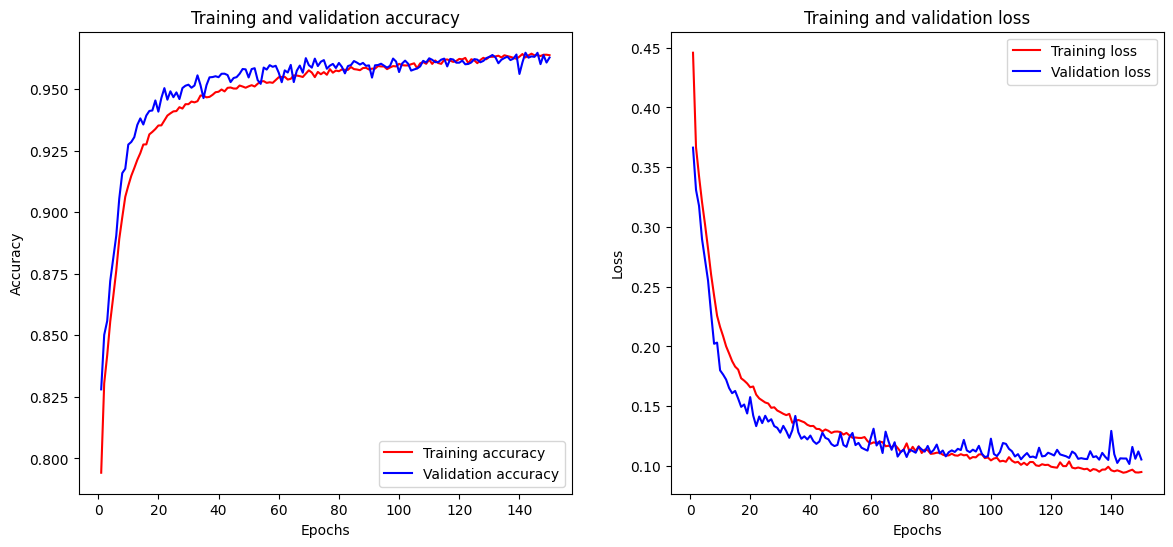

In [27]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

accuracy_values = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

fig, ax = plt.subplots(1,2, figsize=(14,6))

ax[0].plot(epochs, accuracy_values, 'r', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss_values, 'r', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training and validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

In [28]:
y_pred = classifier.predict(x_test).round()
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
specificity = TN / (TN + FP)
sensitivity = TP / (TP + FN)

print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)

1120/1120 [==============================] - 1s 791us/step
Sensitivity :  0.9884331346205179
Specificity :  0.9195591873453782


In [29]:
f1_score(y_test, y_pred, average=None)

array([0.94846317, 0.97087548])

<Axes: >

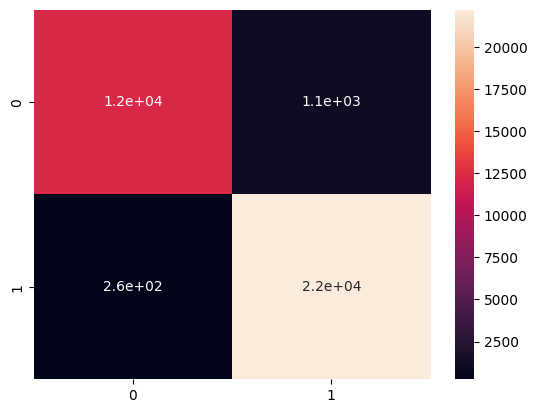

In [30]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)